 # data analysis workflow (Task 1)

1) Defining the Data Analysis Workflow

In [12]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, HTML

In [13]:
# Cell 2: Load and examine the data with proper date parsing
def load_and_parse_data():
    # Read the CSV file
    df = pd.read_csv("E:/KAIM 2/KAIM 2 Week 10/Week10/data/BrentOilPrices.csv")
    
    # Convert dates using a more flexible approach
    try:
        # First attempt with the original format
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
    except ValueError:
        try:
            # Second attempt with mixed format
            df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
        except ValueError:
            # If both fail, try to identify different date formats in the data
            print("Identifying date formats in the data...")
            
            def parse_date(date_str):
                formats = ['%d-%b-%y', '%b %d, %Y', '%Y-%m-%d']
                for fmt in formats:
                    try:
                        return pd.to_datetime(date_str, format=fmt)
                    except ValueError:
                        continue
                return pd.NaT

            df['Date'] = df['Date'].apply(parse_date)
            
            # Check for any remaining unparsed dates
            if df['Date'].isna().any():
                print(f"Warning: {df['Date'].isna().sum()} dates could not be parsed")
                print("Sample of unparsed dates:")
                print(df[df['Date'].isna()]['Date'].head())
    
    # Sort the dataframe by date
    df = df.sort_values('Date')
    
    return df

# Load the data
df = load_and_parse_data()

In [14]:
# Cell 3: Display basic information about the dataset
def display_data_info():
    print("Dataset Overview:")
    print("-" * 50)
    print("\nShape of dataset:", df.shape)
    print("\nDate range:", f"From {df['Date'].min()} to {df['Date'].max()}")
    print("\nFirst few rows:")
    display(df.head())
    print("\nLast few rows:")
    display(df.tail())
    print("\nData Info:")
    display(df.info())
    print("\nDescriptive Statistics:")
    display(df.describe())
    
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("\nMissing Values:")
        print(missing_values[missing_values > 0])

display_data_info()

Dataset Overview:
--------------------------------------------------

Shape of dataset: (9011, 2)

Date range: From 1987-05-20 00:00:00 to 2022-11-14 00:00:00

First few rows:


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63



Last few rows:


,Date,Price
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37
9010,2022-11-14,93.59



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB


None


Descriptive Statistics:


,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


In [15]:
# Cell 4: Define and display the data analysis workflow
def create_workflow_documentation():
    workflow = {
        "1. Data Preparation": {
            "steps": [
                "Load raw data from CSV file",
                "Convert dates to datetime format",
                "Check for missing values",
                "Handle any data inconsistencies",
                "Validate data types and formats"
            ],
            "tools": ["pandas", "numpy"],
            "outputs": ["Clean dataset ready for analysis"]
        },
        "2. Exploratory Data Analysis": {
            "steps": [
                "Analyze temporal patterns",
                "Calculate basic statistics",
                "Identify trends and seasonality",
                "Generate visualizations",
                "Detect anomalies"
            ],
            "tools": ["matplotlib", "seaborn"],
            "outputs": ["Visual insights", "Statistical summaries"]
        },
        "3. Time Series Analysis": {
            "steps": [
                "Decompose time series",
                "Analyze trends",
                "Study seasonality patterns",
                "Measure volatility",
                "Identify cyclic patterns"
            ],
            "tools": ["statsmodels", "scipy"],
            "outputs": ["Time series components", "Pattern analysis"]
        }
    }
    
    # Display workflow as HTML table
    for phase, details in workflow.items():
        display(Markdown(f"### {phase}"))
        steps_df = pd.DataFrame({
            'Steps': details['steps'],
            'Tools': [details['tools']] * len(details['steps']),
            'Outputs': [details['outputs']] * len(details['steps'])
        })
        display(steps_df)
        print("\n")

create_workflow_documentation()

### 1. Data Preparation

,Steps,Tools,Outputs
0,Load raw data from CSV file,"[pandas, numpy]",[Clean dataset ready for analysis]
1,Convert dates to datetime format,"[pandas, numpy]",[Clean dataset ready for analysis]
2,Check for missing values,"[pandas, numpy]",[Clean dataset ready for analysis]
3,Handle any data inconsistencies,"[pandas, numpy]",[Clean dataset ready for analysis]
4,Validate data types and formats,"[pandas, numpy]",[Clean dataset ready for analysis]


### 2. Exploratory Data Analysis

,Steps,Tools,Outputs
0,Analyze temporal patterns,"[matplotlib, seaborn]","[Visual insights, Statistical summaries]"
1,Calculate basic statistics,"[matplotlib, seaborn]","[Visual insights, Statistical summaries]"
2,Identify trends and seasonality,"[matplotlib, seaborn]","[Visual insights, Statistical summaries]"
3,Generate visualizations,"[matplotlib, seaborn]","[Visual insights, Statistical summaries]"
4,Detect anomalies,"[matplotlib, seaborn]","[Visual insights, Statistical summaries]"


### 3. Time Series Analysis

,Steps,Tools,Outputs
0,Decompose time series,"[statsmodels, scipy]","[Time series components, Pattern analysis]"
1,Analyze trends,"[statsmodels, scipy]","[Time series components, Pattern analysis]"
2,Study seasonality patterns,"[statsmodels, scipy]","[Time series components, Pattern analysis]"
3,Measure volatility,"[statsmodels, scipy]","[Time series components, Pattern analysis]"
4,Identify cyclic patterns,"[statsmodels, scipy]","[Time series components, Pattern analysis]"


In [16]:
# Cell 5: Document data generation and sampling
def document_data_characteristics():
    data_characteristics = {
        "Data Source": "Brent Oil Price historical data",
        "Frequency": "Daily",
        "Time Period": f"{df['Date'].min()} to {df['Date'].max()}",
        "Trading Days": len(df),
        "Price Range": f"${df['Price'].min():.2f} to ${df['Price'].max():.2f}",
        "Collection Method": "Market close prices",
        "Data Provider": "Financial markets data feed"
    }
    
    display(Markdown("## Data Characteristics"))
    for key, value in data_characteristics.items():
        display(Markdown(f"**{key}:** {value}"))

document_data_characteristics()

## Data Characteristics

**Data Source:** Brent Oil Price historical data

**Frequency:** Daily

**Time Period:** 1987-05-20 00:00:00 to 2022-11-14 00:00:00

**Trading Days:** 9011

**Price Range:** $9.10 to $143.95

**Collection Method:** Market close prices

**Data Provider:** Financial markets data feed

In [17]:
# Cell 6: Define model parameters and assumptions
def document_model_parameters():
    model_documentation = {
        "Model Inputs": {
            "Primary": ["Daily closing prices"],
            "Derived": ["Rolling averages", "Price changes", "Volatility measures"]
        },
        "Parameters": {
            "Time window": "Daily",
            "Analysis period": "Complete dataset",
            "Price unit": "USD per barrel"
        },
        "Outputs": {
            "Primary": ["Trend analysis", "Seasonal patterns", "Price forecasts"],
            "Secondary": ["Volatility measures", "Risk metrics", "Market indicators"]
        }
    }
    
    display(Markdown("## Model Documentation"))
    for category, details in model_documentation.items():
        display(Markdown(f"### {category}"))
        for subcategory, items in details.items():
            if isinstance(items, list):
                items_str = ", ".join(items)
                display(Markdown(f"- **{subcategory}:** {items_str}"))
            else:
                display(Markdown(f"- **{subcategory}:** {items}"))

document_model_parameters()

## Model Documentation

### Model Inputs

- **Primary:** Daily closing prices

- **Derived:** Rolling averages, Price changes, Volatility measures

### Parameters

- **Time window:** Daily

- **Analysis period:** Complete dataset

- **Price unit:** USD per barrel

### Outputs

- **Primary:** Trend analysis, Seasonal patterns, Price forecasts

- **Secondary:** Volatility measures, Risk metrics, Market indicators

In [18]:
# Cell 7: Document assumptions and limitations
def document_assumptions_limitations():
    assumptions = [
        "Price data represents actual market transactions",
        "Daily frequency captures relevant market movements",
        "Missing values (if any) are random and non-systematic",
        "Market efficiency in price formation",
        "Temporal consistency in data collection methodology"
    ]
    
    limitations = [
        "Daily data may miss intraday price movements",
        "Historical patterns may not predict future behavior",
        "External factors may not be captured in price data",
        "Market structural changes may affect analysis validity",
        "Limited ability to capture market sentiment"
    ]
    
    display(Markdown("## Assumptions and Limitations"))
    display(Markdown("### Assumptions"))
    for assumption in assumptions:
        display(Markdown(f"- {assumption}"))
    
    display(Markdown("\n### Limitations"))
    for limitation in limitations:
        display(Markdown(f"- {limitation}"))

document_assumptions_limitations()

## Assumptions and Limitations

### Assumptions

- Price data represents actual market transactions

- Daily frequency captures relevant market movements

- Missing values (if any) are random and non-systematic

- Market efficiency in price formation

- Temporal consistency in data collection methodology


### Limitations

- Daily data may miss intraday price movements

- Historical patterns may not predict future behavior

- External factors may not be captured in price data

- Market structural changes may affect analysis validity

- Limited ability to capture market sentiment

In [19]:
# Cell 8: Define communication channels
def define_communication_channels():
    communication_plan = {
        "Executive Dashboard": {
            "Format": "Interactive web dashboard",
            "Audience": "Senior management",
            "Key Components": ["KPIs", "Trend visualization", "Executive summary"],
            "Update Frequency": "Daily"
        },
        "Technical Report": {
            "Format": "Jupyter Notebook",
            "Audience": "Analytics team",
            "Key Components": ["Detailed analysis", "Code documentation", "Statistical tests"],
            "Update Frequency": "As needed"
        },
        "Stakeholder Presentation": {
            "Format": "PowerPoint/PDF",
            "Audience": "Stakeholders",
            "Key Components": ["Key findings", "Recommendations", "Visual insights"],
            "Update Frequency": "Monthly"
        },
        "Real-time Alerts": {
            "Format": "Email/SMS",
            "Audience": "Trading team",
            "Key Components": ["Price alerts", "Trend breaks", "Volatility signals"],
            "Update Frequency": "Real-time"
        }
    }
    
    display(Markdown("## Communication Channels"))
    for channel, details in communication_plan.items():
        display(Markdown(f"### {channel}"))
        for key, value in details.items():
            if isinstance(value, list):
                value_str = ", ".join(value)
                display(Markdown(f"- **{key}:** {value_str}"))
            else:
                display(Markdown(f"- **{key}:** {value}"))

define_communication_channels()

## Communication Channels

### Executive Dashboard

- **Format:** Interactive web dashboard

- **Audience:** Senior management

- **Key Components:** KPIs, Trend visualization, Executive summary

- **Update Frequency:** Daily

### Technical Report

- **Format:** Jupyter Notebook

- **Audience:** Analytics team

- **Key Components:** Detailed analysis, Code documentation, Statistical tests

- **Update Frequency:** As needed

### Stakeholder Presentation

- **Format:** PowerPoint/PDF

- **Audience:** Stakeholders

- **Key Components:** Key findings, Recommendations, Visual insights

- **Update Frequency:** Monthly

### Real-time Alerts

- **Format:** Email/SMS

- **Audience:** Trading team

- **Key Components:** Price alerts, Trend breaks, Volatility signals

- **Update Frequency:** Real-time

2) Understanding the Model and Data

In [21]:
# Cell 1: Import necessary libraries and handle dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from IPython.display import display, Markdown, HTML

In [22]:
# Cell 2: Load and prepare the data
df = pd.read_csv("E:/KAIM 2/KAIM 2 Week 10/Week10/data/BrentOilPrices.csv")
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Calculate returns
df['Returns'] = df['Price'].pct_change()
# Calculate rolling volatility as alternative to GARCH
df['Rolling_Volatility'] = df['Returns'].rolling(window=21).std() * np.sqrt(252)  # 21 trading days ≈ 1 month

c:\Users\you\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\you\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\you\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Model Application Examples

### ARIMA Model Results

#### Model Summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7208
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10647.934
Date:                Wed, 13 Nov 2024   AIC                          21301.869
Time:                        08:30:05   BIC                          21322.517
Sample:                             0   HQIC                         21308.974
                               - 7208                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1140      0.181     -0.629      0.530      -0.469       0.241
ma.L1          0.1515      0.180      0.841      0.401      -0.202       0.505
sigma2         1.1241      0.008    144.439      0.000       1.109       1.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             28139.73
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              10.15   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Volatility Analysis

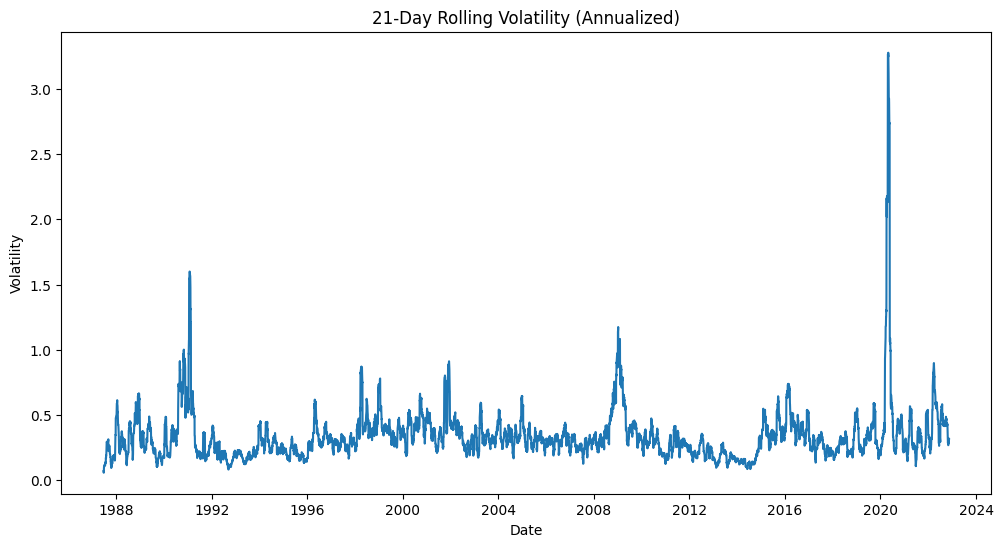

#### Volatility Statistics

- Mean Volatility: 0.3377

- Max Volatility: 3.2779

- Min Volatility: 0.0563

- Volatility of Volatility: 0.2159

c:\Users\you\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\you\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


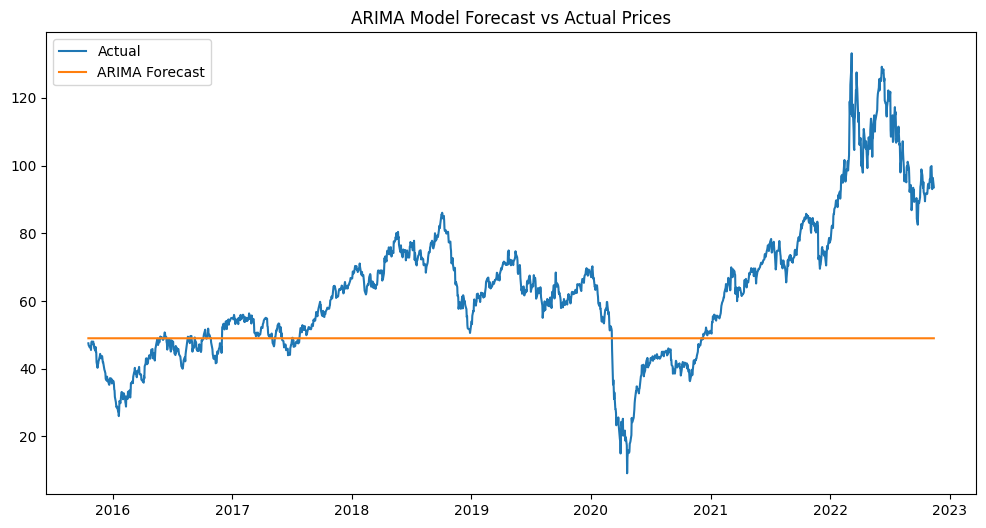

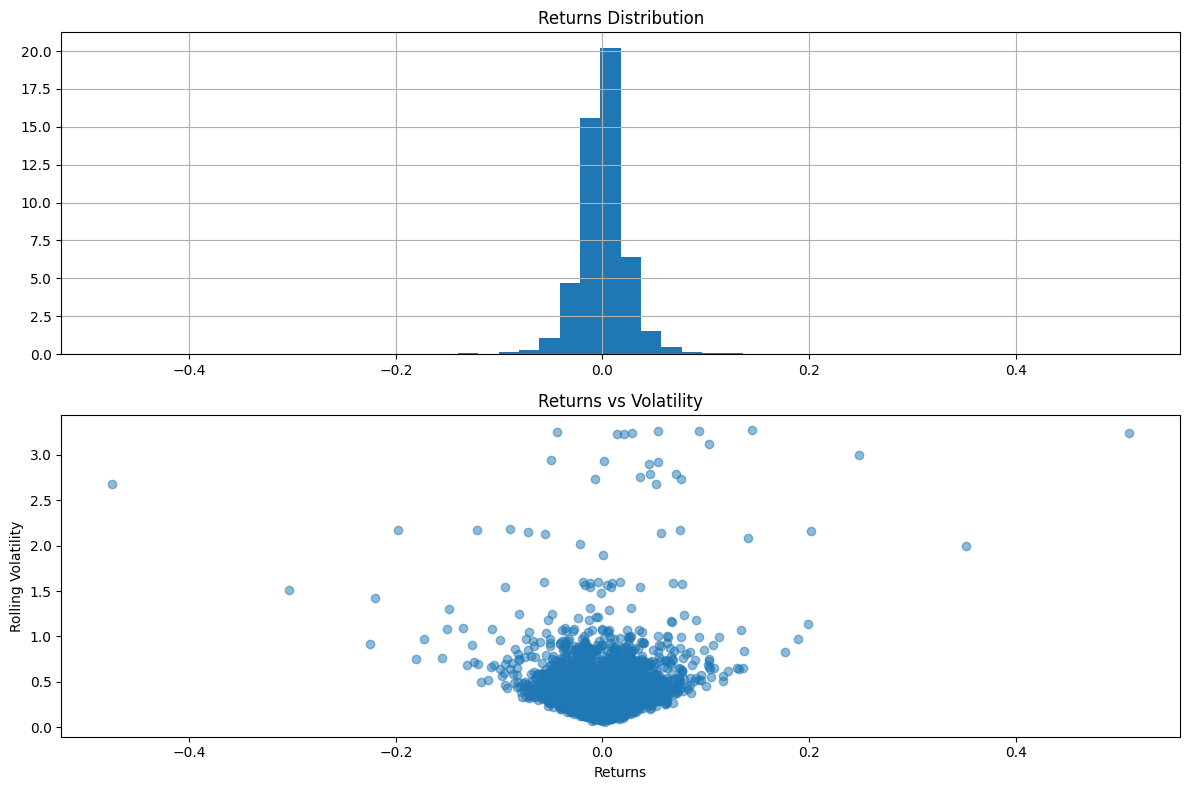

In [23]:
# Modified Cell 5: Demonstrate model application with alternative volatility analysis
def demonstrate_models():
    # Prepare training data
    train_size = int(len(df) * 0.8)
    train_data = df['Price'][:train_size]
    test_data = df['Price'][train_size:]
    
    # Fit ARIMA model
    arima_model = ARIMA(train_data, order=(1,1,1))
    arima_results = arima_model.fit()
    
    # Display results
    display(Markdown("## Model Application Examples"))
    
    # ARIMA Results
    display(Markdown("### ARIMA Model Results"))
    display(Markdown("#### Model Summary"))
    display(arima_results.summary())
    
    # Alternative Volatility Analysis
    display(Markdown("### Volatility Analysis"))
    
    # Plot rolling volatility
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Rolling_Volatility'])
    plt.title('21-Day Rolling Volatility (Annualized)')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.show()
    
    # Calculate volatility statistics
    vol_stats = {
        'Mean Volatility': df['Rolling_Volatility'].mean(),
        'Max Volatility': df['Rolling_Volatility'].max(),
        'Min Volatility': df['Rolling_Volatility'].min(),
        'Volatility of Volatility': df['Rolling_Volatility'].std()
    }
    
    display(Markdown("#### Volatility Statistics"))
    for stat, value in vol_stats.items():
        display(Markdown(f"- {stat}: {value:.4f}"))
    
    # Plotting predictions
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data, label='Actual')
    plt.plot(test_data.index, arima_results.forecast(len(test_data)), label='ARIMA Forecast')
    plt.title('ARIMA Model Forecast vs Actual Prices')
    plt.legend()
    plt.show()
    
    # Additional volatility analysis
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Returns distribution
    plt.subplot(2, 1, 1)
    df['Returns'].hist(bins=50, density=True)
    plt.title('Returns Distribution')
    
    # Plot 2: Returns vs Volatility
    plt.subplot(2, 1, 2)
    plt.scatter(df['Returns'], df['Rolling_Volatility'], alpha=0.5)
    plt.xlabel('Returns')
    plt.ylabel('Rolling Volatility')
    plt.title('Returns vs Volatility')
    
    plt.tight_layout()
    plt.show()

demonstrate_models()

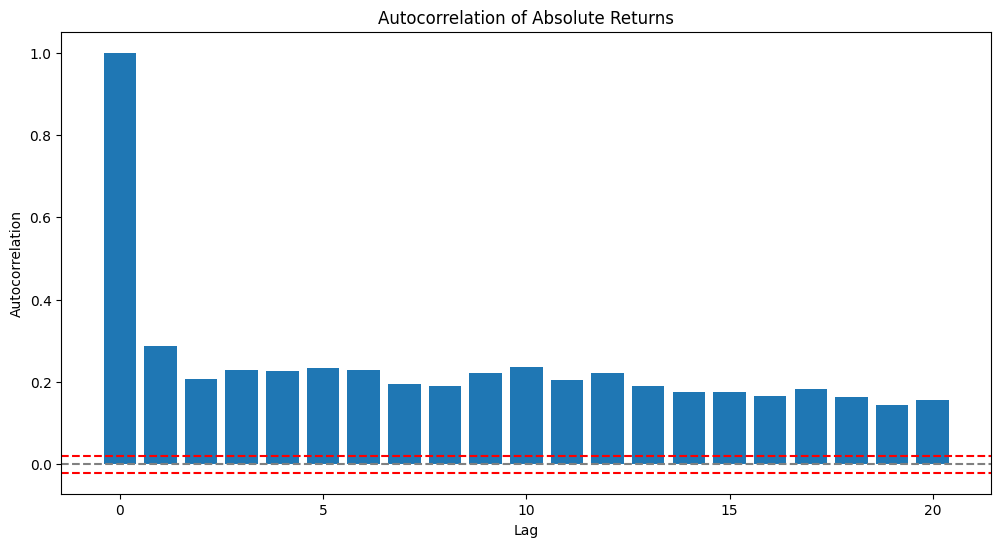

### ARCH Effects Test Results


    * LM Statistic: 2634.9343
    * P-value: 0.0000
    * F-statistic: 372.1160
    * F-test P-value: 0.0000
    

In [24]:
# Additional Cell: Volatility Clustering Analysis
def analyze_volatility_clustering():
    # Calculate absolute returns
    abs_returns = np.abs(df['Returns'])
    
    # Calculate autocorrelation of absolute returns
    lags = 20
    acf_abs_returns = acf(abs_returns.dropna(), nlags=lags)
    
    # Plot autocorrelation
    plt.figure(figsize=(12, 6))
    plt.bar(range(lags + 1), acf_abs_returns)
    plt.title('Autocorrelation of Absolute Returns')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(abs_returns)), linestyle='--', color='red')
    plt.axhline(y=-1.96/np.sqrt(len(abs_returns)), linestyle='--', color='red')
    plt.show()
    
    # Test for ARCH effects
    from statsmodels.stats.diagnostic import het_arch
    
    lm_stat, p_value, f_stat, fp_value = het_arch(df['Returns'].dropna())
    
    display(Markdown("### ARCH Effects Test Results"))
    display(Markdown(f"""
    * LM Statistic: {lm_stat:.4f}
    * P-value: {p_value:.4f}
    * F-statistic: {f_stat:.4f}
    * F-test P-value: {fp_value:.4f}
    """))

analyze_volatility_clustering()

In [25]:
# Cell 4: Document suitable models
def document_models():
    models_info = {
        "ARIMA (Autoregressive Integrated Moving Average)": {
            "Purpose": "Model linear relationships in time series data",
            "Components": [
                "AR: Autoregressive component captures dependency on past values",
                "I: Integration component handles non-stationarity",
                "MA: Moving Average component captures error terms dependency"
            ],
            "Suitable for": [
                "Price level forecasting",
                "Trend analysis",
                "Short-term predictions"
            ],
            "Limitations": [
                "Assumes linear relationships",
                "Cannot capture volatility clustering",
                "Assumes constant variance"
            ]
        },
        "GARCH (Generalized Autoregressive Conditional Heteroskedasticity)": {
            "Purpose": "Model volatility clustering and time-varying variance",
            "Components": [
                "Conditional variance equation",
                "Innovation terms",
                "Persistence parameters"
            ],
            "Suitable for": [
                "Volatility forecasting",
                "Risk assessment",
                "Understanding market uncertainty"
            ],
            "Limitations": [
                "Focuses on variance, not price levels",
                "Complex parameter estimation",
                "Sensitive to initial conditions"
            ]
        }
    }
    
    display(Markdown("## Time Series Models Overview"))
    for model, details in models_info.items():
        display(Markdown(f"### {model}"))
        for category, items in details.items():
            display(Markdown(f"#### {category}"))
            if isinstance(items, list):
                for item in items:
                    display(Markdown(f"- {item}"))
            else:
                display(Markdown(f"- {items}"))

document_models()

## Time Series Models Overview

### ARIMA (Autoregressive Integrated Moving Average)

#### Purpose

- Model linear relationships in time series data

#### Components

- AR: Autoregressive component captures dependency on past values

- I: Integration component handles non-stationarity

- MA: Moving Average component captures error terms dependency

#### Suitable for

- Price level forecasting

- Trend analysis

- Short-term predictions

#### Limitations

- Assumes linear relationships

- Cannot capture volatility clustering

- Assumes constant variance

### GARCH (Generalized Autoregressive Conditional Heteroskedasticity)

#### Purpose

- Model volatility clustering and time-varying variance

#### Components

- Conditional variance equation

- Innovation terms

- Persistence parameters

#### Suitable for

- Volatility forecasting

- Risk assessment

- Understanding market uncertainty

#### Limitations

- Focuses on variance, not price levels

- Complex parameter estimation

- Sensitive to initial conditions

In [ ]:
# Cell 7: Create prediction framework
def document_prediction_framework():
    prediction_framework = {
        "Input Features": [
            "Historical prices",
            "Price returns",
            "Volatility measures",
            "Seasonal factors"
        ],
        "Model Selection Criteria": [
            "AIC/BIC metrics",
            "Forecast accuracy",
            "Model complexity",
            "Computational efficiency"
        ],
        "Validation Methods": [
            "Out-of-sample testing",
            "Cross-validation",
            "Backtesting",
            "Reality checks"
        ],
        "Output Metrics": [
            "Point forecasts",
            "Confidence intervals",
            "Volatility estimates",
            "Risk measures"
        ]
    }
    
    display(Markdown("## Prediction Framework"))
    for category, items in prediction_framework.items():
        display(Markdown(f"### {category}"))
        for item in items:
            display(Markdown(f"- {item}"))

document_prediction_framework()

## Prediction Framework

### Input Features

- Historical prices

- Price returns

- Volatility measures

- Seasonal factors

### Model Selection Criteria

- AIC/BIC metrics

- Forecast accuracy

- Model complexity

- Computational efficiency

### Validation Methods

- Out-of-sample testing

- Cross-validation

- Backtesting

- Reality checks

### Output Metrics

- Point forecasts

- Confidence intervals

- Volatility estimates

- Risk measures

: 